# Explore mpg Dataset

In [273]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from operator import attrgetter
from scipy import stats
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from collections import namedtuple
from sklearn.svm import SVR
from slm import SimpleLinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from warnings import filterwarnings
# %matplotlib notebook

In [274]:
filterwarnings(action="ignore")

In [275]:
r2 = lambda x:round(x,2)
r3 = lambda x:round(x,3)

In [276]:
sns.set_style("whitegrid")

## Import mpg Data

In [277]:
mpg = pd.read_csv(r"/Users/kwe/advancing-into-analytics-book/datasets/mpg/mpg.csv")

## Exploritory Data Analysis

   - Start with descriptive statistics of the mpg dataset
   - Create a One-Way frequency table of the categorical variable "origin" (pandas cross table)
   - Create a Two-Way frequency table of the categorical variable "origin" by the categorical variable "Cylinder" (pandas cross table)
   - Retrieve descriptive statistics of "mpg" grouped by each level of the categorical variable "origin"
   - Visualize the distribution of mpg
   - Compair the distribution of "mpg" accross each level of "origin" using both box plots and facted histograms (distplot for facted histograms)
   - Do any extra exploring you wish
   - compair weight accross origin as well

In [278]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model.year,origin,car.name
0,18.0,8,307.0,130,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,USA,ford torino


In [279]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model.year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


# One-Way Frequency Chart of Count of Cars by Country of Origin

In [280]:
pd.crosstab(index=mpg.origin, columns="Count")

col_0,Count
origin,
Asia,79
Europe,68
USA,245


# Two-way Frequency Chart of Count of Cars by Country of origin by cylander Type

In [281]:
pd.crosstab(index=mpg.origin, columns=mpg.cylinders)

cylinders,3,4,5,6,8
origin,,,,,
Asia,4,69,0,6,0
Europe,0,61,3,4,0
USA,0,69,0,73,103


# Comparing Weight of Cars by Country of Origin

In [282]:
mpg.groupby("origin").describe()["weight"]

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
Asia,79.0,2221.227848,320.497248,1613.0,1985.00,2155.0,2412.50,2930.0
Europe,68.0,2433.470588,491.813867,1825.0,2071.75,2240.0,2803.75,3820.0
USA,245.0,3372.489796,795.346690,1800.0,2720.00,3381.0,4055.00,5140.0


In [283]:
mpg.groupby("origin").describe()["mpg"]

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
Asia,79.0,30.450633,6.090048,18.0,25.70,31.6,34.050,46.6
Europe,68.0,27.602941,6.580182,16.2,23.75,26.0,30.125,44.3
USA,245.0,20.033469,6.440384,9.0,15.00,18.5,24.000,39.0


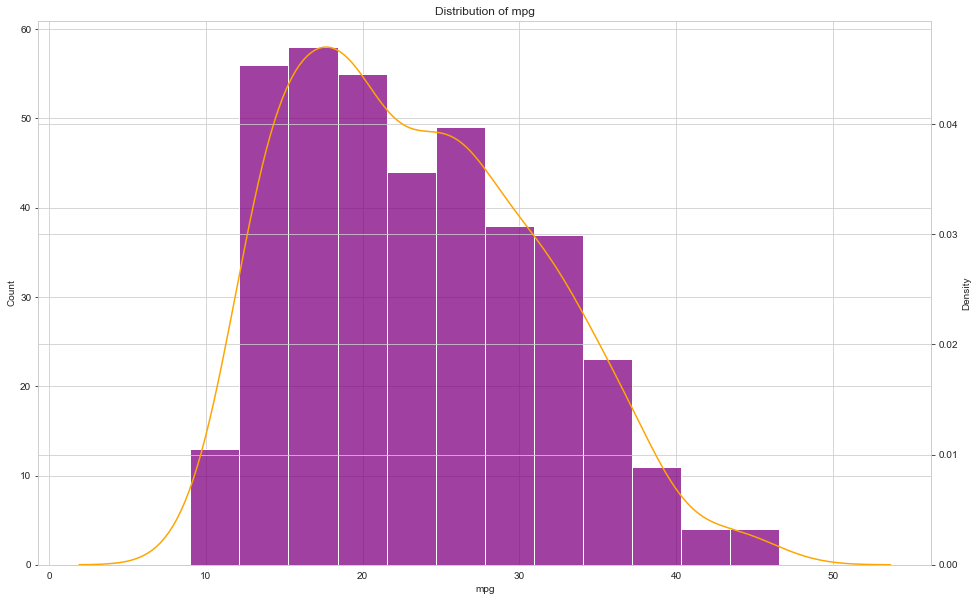

mpg Skewness: 0.46


In [284]:
fig, ax = plt.subplots(figsize=(16,10))
sns.histplot(data=mpg, x="mpg", color="purple")
ax2 = ax.twinx()
sns.kdeplot(data=mpg, x="mpg",color="orange",ax=ax2)
plt.title("Distribution of mpg")
plt.show()
print("mpg Skewness: {}".format(r2(stats.skew(mpg.mpg))))

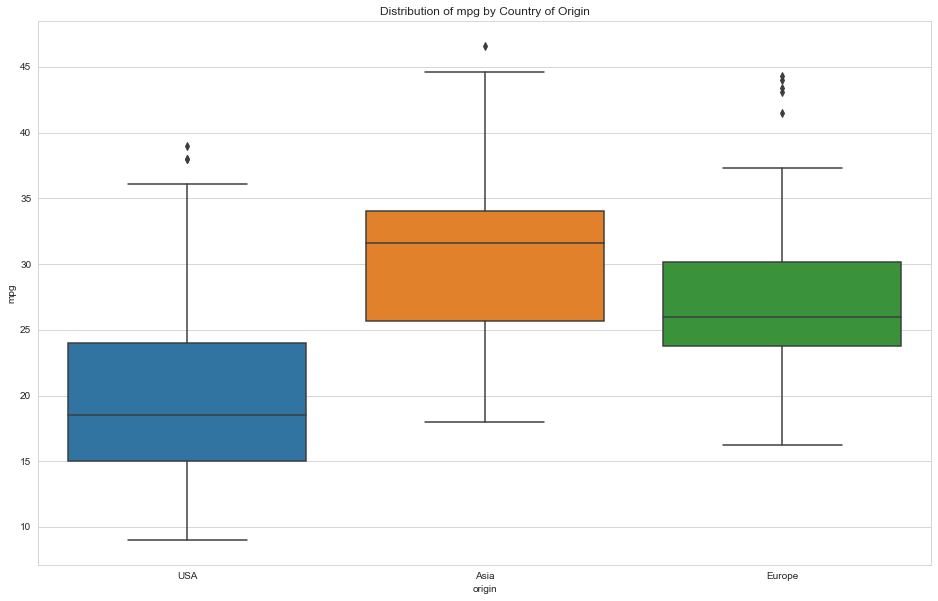

In [285]:
plt.figure(figsize=(16,10))
sns.boxplot(data=mpg, x="origin", y="mpg")
plt.title("Distribution of mpg by Country of Origin")
plt.show()

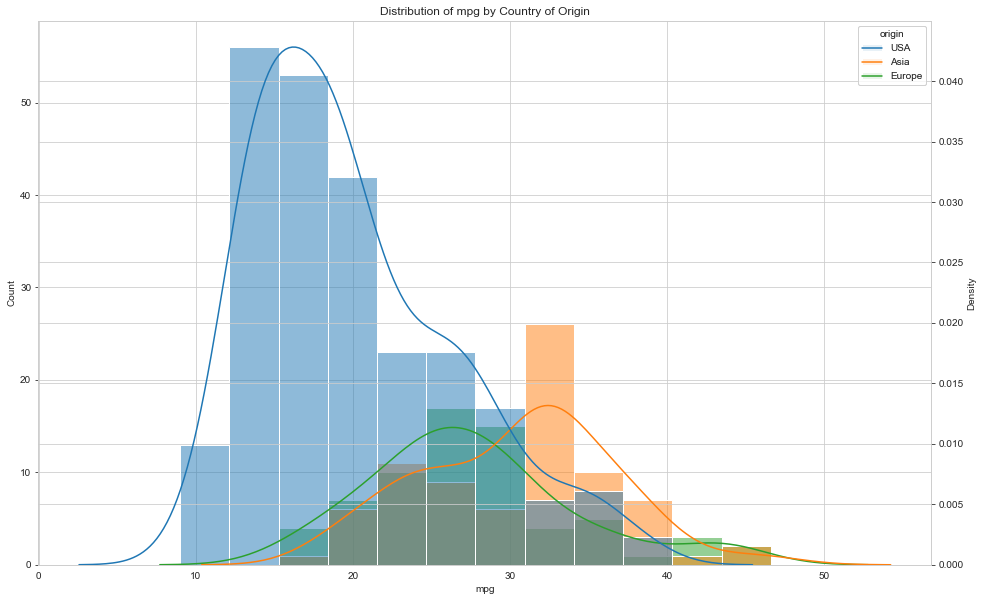

mpg USA Skewness: 0.84
mpg Asia Skewness: 0.01
mpg Europe Skewness: 0.75


In [286]:
fig, ax = plt.subplots(figsize=(16,10))
sns.histplot(data=mpg, x="mpg",hue="origin")
ax2 = ax.twinx()
sns.kdeplot(data=mpg, x="mpg",hue="origin",ax=ax2)
plt.title("Distribution of mpg by Country of Origin")
plt.show()
print("mpg USA Skewness: {}".format(r2(stats.skew(mpg[mpg["origin"]=="USA"].mpg))))
print("mpg Asia Skewness: {}".format(r2(stats.skew(mpg[mpg["origin"]=="Asia"].mpg))))
print("mpg Europe Skewness: {}".format(r2(stats.skew(mpg[mpg["origin"]=="Europe"].mpg))))

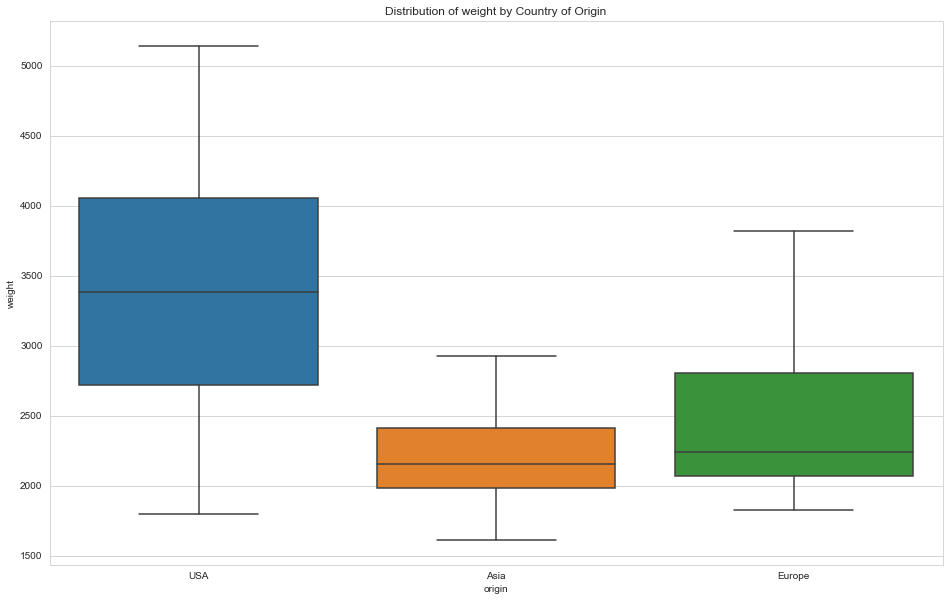

In [287]:
plt.figure(figsize=(16,10))
sns.boxplot(data=mpg, x="origin", y="weight")
plt.title("Distribution of weight by Country of Origin")
plt.show()

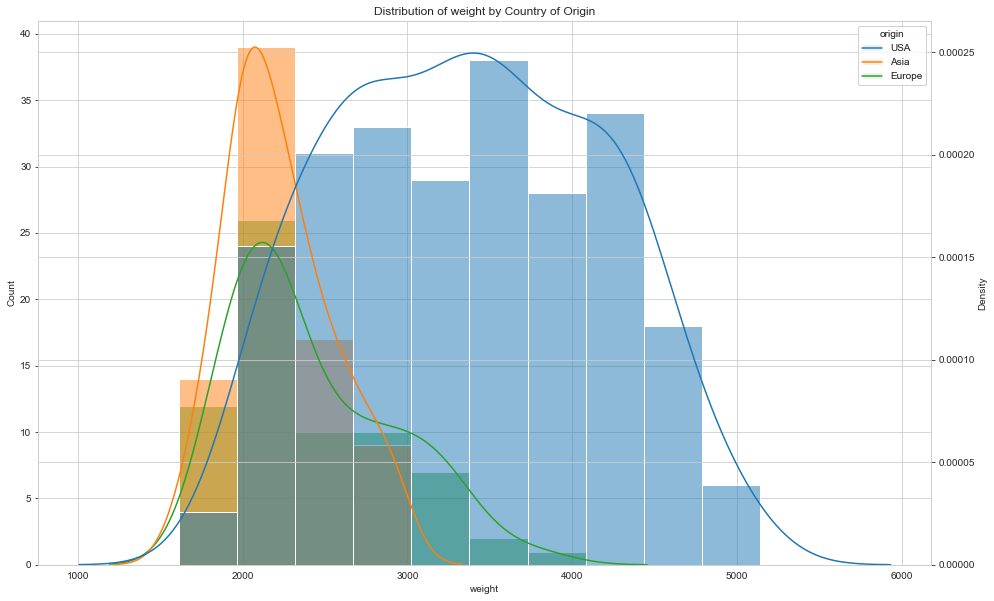

weight USA Skewness: 0.07
weight Asia Skewness: 0.49
weight Europe Skewness: 0.79


In [288]:
fig, ax = plt.subplots(figsize=(16,10))
sns.histplot(data=mpg, x="weight",hue="origin")
ax2 = ax.twinx()
sns.kdeplot(data=mpg, x="weight",hue="origin",ax=ax2)
plt.title("Distribution of weight by Country of Origin")
plt.show()
print("weight USA Skewness: {}".format(r2(stats.skew(mpg[mpg["origin"]=="USA"].weight))))
print("weight Asia Skewness: {}".format(r2(stats.skew(mpg[mpg["origin"]=="Asia"].weight))))
print("weight Europe Skewness: {}".format(r2(stats.skew(mpg[mpg["origin"]=="Europe"].weight))))

## Correlation Matrix to Analyze Continuous Variables in The mpg Dataset

In [289]:
mpg[['mpg','horsepower', 'weight']].corr()

,mpg,horsepower,weight
mpg,1.000000,-0.778427,-0.832244
horsepower,-0.778427,1.000000,0.864538
weight,-0.832244,0.864538,1.000000


## Use pairplot From The seaborn Module to Visualize Continuous Variables

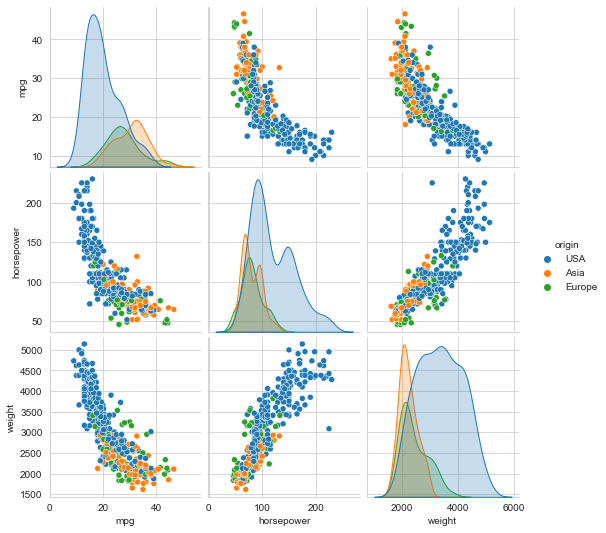

In [290]:
sns.pairplot(data = mpg, vars=['mpg','horsepower', 'weight'] ,hue='origin')
plt.show()

## Hypothesis Testing
    
   - Define your Hypothesis
   - H0: There is no difference in average mpg between the US and Asia
   - Ha: There is a difference in average mpg between the US and Asia
   - H0:Mu1 + Mu2 = 0
   - Ha:Mu1 + Mu2 != 0
    
    
### Compare USA and European "mpg"

   - Explore the descriptive statistics between the two variables
   - Define weither this is a Independent or Dependent Test (Idependent t-test)
   - Define you Level of Significance (0.05)
   - Is this a Two-Tailed test or One_Tailed? (Two-Tailed)
   - use the stats sub-module to conduct a t-test
   - What was the result of the t-test?
   - bonus: Do the t-test manually through procedual programming and generate CI range
   - bonus: Use researchpy module for hypothesis tests with more results or solve the hypothesis test in a OOP manner   



In [291]:
x = mpg[mpg.origin == "USA"].mpg.values
y = mpg[mpg.origin == "Asia"].mpg.values

In [292]:
(
    mpg[mpg.origin != "Europe"]
     .reset_index(drop=True)
     .groupby("origin")
     .describe()["mpg"]
)

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
Asia,79.0,30.450633,6.090048,18.0,25.7,31.6,34.05,46.6
USA,245.0,20.033469,6.440384,9.0,15.0,18.5,24.00,39.0


In [293]:
stats.ttest_ind(a=x, b=y)

Ttest_indResult(statistic=-12.664889006229084, pvalue=4.17283714676552e-30)

In [294]:
del x
del y

## Visualize The Relationship Between "weight" and "mpg"

In [295]:
x = mpg.weight.values
y = mpg.mpg.values
slm = SimpleLinearRegression()
slm.FitModel(x,y)

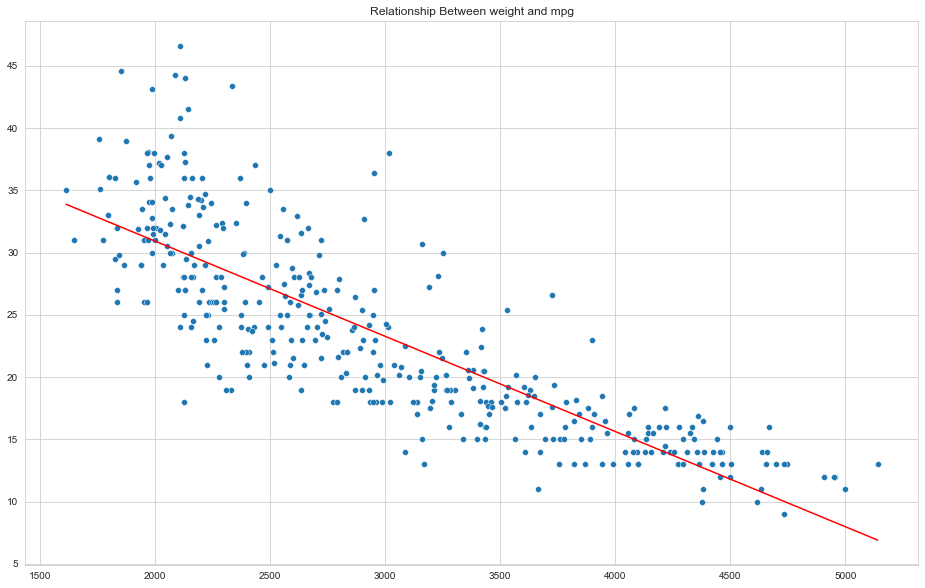

Pearson Correlation Coefficient: -0.83


In [296]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=x, y=y)
sns.lineplot(y=slm.predictor(x),x=x, color="red")
plt.title("Relationship Between weight and mpg")
plt.show()
print(f"Pearson Correlation Coefficient: {r2(stats.pearsonr(x,y)[0])}")

## Univariate Linear Regression

- Use stats.linregress from the scipy.stats sub-module to return the regression model and summarize the relationship between "weight" and "mpg"

In [297]:
stats.linregress(x,y)

LinregressResult(slope=-0.007647342535779581, intercept=46.21652454901758, rvalue=-0.8322442148315755, pvalue=6.015296051435213e-102, stderr=0.00025796327827343175, intercept_stderr=0.7986724633128346)

In [298]:
slm._intercept

46.21652454901758

In [299]:
slm._slope

-0.007647342535779584

## Visualize The Linear Regression Model (Line of Best Fit)

   - Use sns.regplot to visualize the relationship of "weight" to "mpg"
   - Label the x and y axis
   - Give the visualization a title

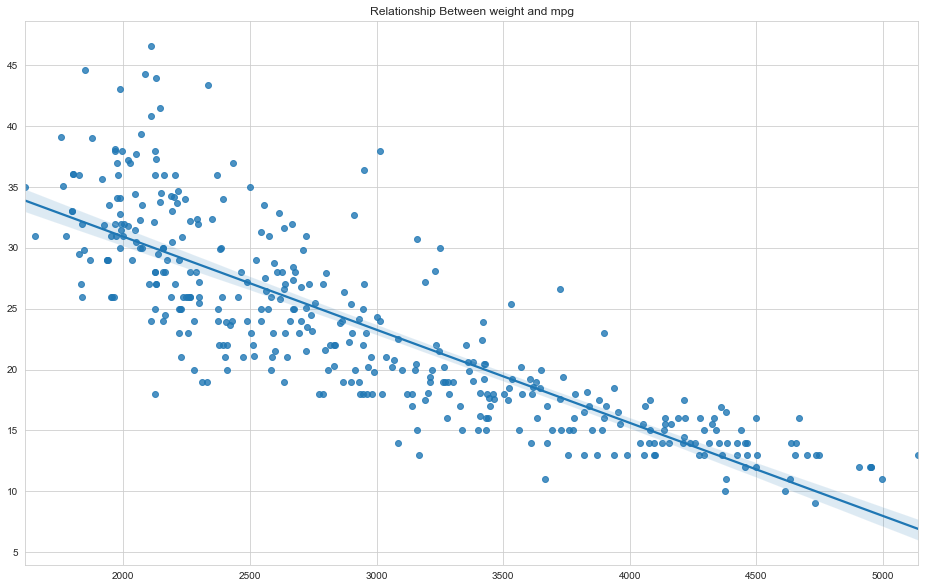

In [300]:
plt.figure(figsize=(16,10))
sns.regplot(x=x, y=y)
plt.title("Relationship Between weight and mpg")
plt.show()

## Build a Univariate Linear Regression Model

   - Train and test the linear relationship between "weight" and "mpg"
   - Instantiate your simple linear regression model
   - Train your model with test data
   - Use training data to predict your y values
   - return the intercept and slope values

In [301]:
X_train, X_test, y_train, y_test = (
    model_selection.train_test_split(
         x
        ,y
        ,test_size=0.25
        ,random_state=12
        )
    )

In [302]:
lm = linear_model.LinearRegression()

In [303]:
# takes column vectors as parameters

lm.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))

LinearRegression()

In [304]:
y_pred = lm.predict(X_test.reshape(-1,1))
y_pred[:5]

array([[29.43226286],
       [28.94816335],
       [26.59469493],
       [17.75429298],
       [32.15066785]])

In [305]:
slm.FitModel(X_train.reshape(-1,1),y_train.reshape(-1,1))

In [306]:
slm.predictor(X_test)[:5]
lm.intercept_

array([45.25859323])

In [307]:
slm._intercept

array([45.25859323])

In [308]:
lm.coef_

array([[-0.00744768]])

In [309]:
slm._slope

array([-0.00744768])

## Evaluate Residual Error

   - Use the metrics sub-module
   - R-Squared
   - Mean Squared Error

In [310]:
r_squared = (
  r2(
    metrics.r2_score(
       y_test
      ,y_pred
      ) * 100
    )
  )
print(
        "Percentage of variability that can be explained by the model:" 
      + "\n" 
      + f": {r2(r_squared)}%"
)

Percentage of variability that can be explained by the model:
: 68.46%


In [311]:
mse = metrics.mean_squared_error(y_test,y_pred)
print("MSE: {}".format(r2(mse)))

MSE: 23.48


# Polynomial Regression

In [312]:
poly = PolynomialFeatures(3)
x_poly = poly.fit_transform(x.reshape(-1,1))
poly_lin_mod = linear_model.LinearRegression()
poly_lin_mod.fit(x_poly,y)
y_pred = poly_lin_mod.predict(x_poly)

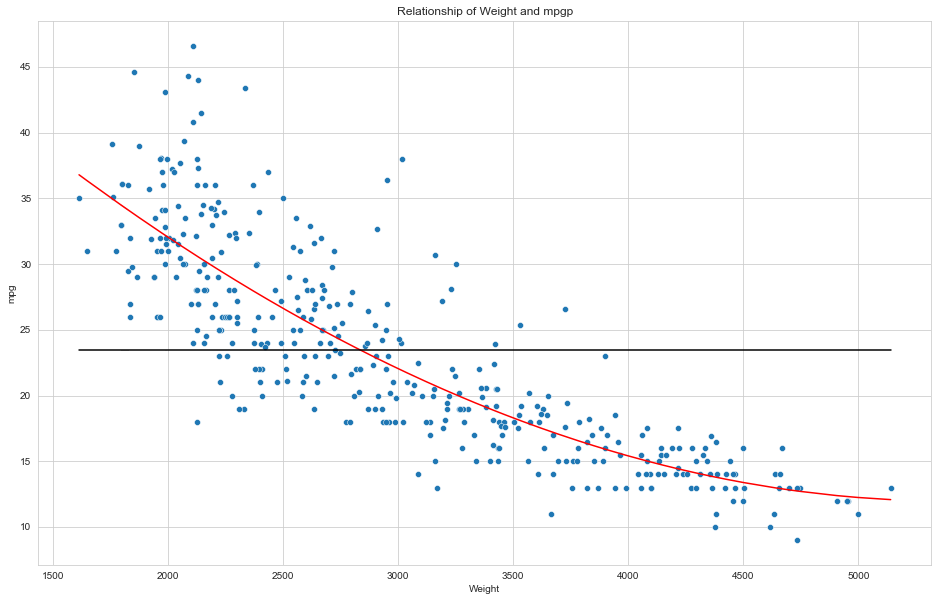

Percent of Explained Variability: 72.0%


In [313]:
plt.figure(figsize=(16,10))
sns.lineplot(x=x,y=y_pred,color="red")
sns.scatterplot(x=x,y=y)
sns.lineplot(x=x,y=r2(np.mean(y)), color="black")
plt.xlabel("Weight")
plt.ylabel("mpg")
plt.title("Relationship of Weight and mpgp")
plt.show()
r_sqr_poly = r2(metrics.r2_score(y,y_pred)) * 100
print(f"Percent of Explained Variability: {r_sqr_poly}%")

# Support Vector Regression

In [314]:
svr = (
    SVR(  kernel='rbf',
            degree=3,
            gamma='scale',
            coef0=0.0,
            tol=0.001,
            C=1.0
            )
        )

In [315]:
x_sc = StandardScaler()
y_sc = StandardScaler()

In [316]:
X = mpg.weight.values.reshape(-1,1)
y = mpg.mpg.values.reshape(-1,1)

X_train,X_test,y_train,y_test = (
    train_test_split(
        X,y,test_size=0.25,random_state=9
        )
    )

In [317]:
X_train = x_sc.fit_transform(X_train).reshape(-1,1)
X_test = x_sc.fit_transform(X_test).reshape(-1,1)
y_train = y_sc.fit_transform(y_train)

In [318]:
svr.fit(X_train,y_train)

SVR()

In [319]:
ypred = (
    y_sc.inverse_transform(
        svr.predict(
            X_test
            ).reshape(-1,1)
        )
    )

In [320]:
results_svm = (
    r2(
        metrics.r2_score(
        y_test,ypred
        )* 100
        )
    )

In [321]:
print(
    "Suport Vector Regression Accuracy: {:.2f}%"
    .format(results_svm)
    )

Suport Vector Regression Accuracy: 79.20%


# Cross Validation Univariate Linear Regression

In [322]:
x = mpg.weight.values.reshape(-1,1)
y = mpg.mpg.values
slm = LinearRegression()

In [323]:
X_train, X_test, y_train, y_test = (
                                        train_test_split(
                                             x
                                            ,y
                                            ,test_size=0.20
                                            , 
                                            random_state=9
                                            )
                                        )

In [324]:
uvlm_cv = (
    r2(
        cross_val_score(
             slm
            ,X_train
            ,y_train
            ).mean() * 100
            )
        )

# Cross Validation Polynomial Regression

In [325]:
x = mpg.weight.values.reshape(-1,1)
y = mpg.mpg.values

In [326]:
poly = PolynomialFeatures(3)
x_poly = poly.fit_transform(x.reshape(-1,1))
poly_lin_mod = linear_model.LinearRegression()
poly_cv = r2(
    cross_val_score(
         poly_lin_mod
        ,X_train
        ,y_train
        ). mean() * 100
        )

# Cross Validation With SVR

In [327]:
svrModel = SVR(kernel="rbf"
              ,degree=3
              ,C = 1)

In [328]:
results_svm_cv = (
    r2(
        cross_val_score(
        svrModel,X_train, y_train
        ).mean() * 100
        )
    )

In [329]:
print(
    "Supprt Vector Regression Cross Validation Accuracy: {:.2f}%".format(results_svm_cv)
)

Supprt Vector Regression Cross Validation Accuracy: 67.04%


# Compare Models

In [330]:
models_no_cv = (
    namedtuple(
           "Model"
          ,"Name Accuracy"
    )
)

models_no_cv = (
                [
                     models_no_cv(Name="Univariate Linear Regression", Accuracy=r_squared)
                    ,models_no_cv(Name="Univariate Polynomial Regression", Accuracy=r_sqr_poly)
                    ,models_no_cv(Name="Support Vector Regression", Accuracy=results_svm)
                ]
                )

In [331]:
models_no_cv

[Model(Name='Univariate Linear Regression', Accuracy=68.46),
 Model(Name='Univariate Polynomial Regression', Accuracy=72.0),
 Model(Name='Support Vector Regression', Accuracy=79.2)]

In [337]:
models_no_cv = sorted(
     models_no_cv
    ,key=attrgetter("Accuracy")
    ,reverse=True
    )

In [339]:
models_no_cv

[Model(Name='Support Vector Regression', Accuracy=79.2),
 Model(Name='Univariate Polynomial Regression', Accuracy=72.0),
 Model(Name='Univariate Linear Regression', Accuracy=68.46)]

# Compare Models Cross Validation

In [333]:
models_cv = (
    namedtuple(
           "Model"
          ,"Name Accuracy"
    )
)

models_cv = (
                [
                     models_cv(Name="Univariate Linear Regression", Accuracy=uvlm_cv)
                    ,models_cv(Name="Univariate Polynomial Regression", Accuracy=poly_cv)
                    ,models_cv(Name="Support Vector Regression", Accuracy=results_svm_cv)
                ]
                )

In [335]:
models_cv = sorted(
     models_cv
    ,key=attrgetter("Accuracy")
    ,reverse=True
    )

In [336]:
models_cv

[Model(Name='Support Vector Regression', Accuracy=67.04),
 Model(Name='Univariate Linear Regression', Accuracy=66.33),
 Model(Name='Univariate Polynomial Regression', Accuracy=66.33)]

# Conclusion

- Suport Vector regression is still the best classifier for models with and without cross validation in regards to predicting mpg given weight
- There is a decent correlation and relationship between weight and mpg
- Weight is a mediocore predictor of mpg but more features will need to be add in order to get a more accurate model

# 